# Inspect cross-validation results

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

#plt.style.use("huddlej")

In [3]:
def matthews_correlation_coefficient(tp, tn, fp, fn):
    """Return Matthews correlation coefficient for values from a confusion matrix.
    Implementation is based on the definition from wikipedia:

    https://en.wikipedia.org/wiki/Matthews_correlation_coefficient
    """
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    if denominator == 0:
            denominator = 1

    return float(numerator) / denominator

def accuracy(tp, tn, fp, fn):
    return (tp + tn) / float(tp + tn + fp + fn)

In [4]:
df = pd.read_table("model_validation.tab", keep_default_na=False, na_values="N/A")

In [5]:
df.head()

,fn,fp,last_training_timepoint,mae,parameter-cTiterSub,parameter-dms,parameter-ep,parameter-ep_x,parameter-lbi,parameter-ne,...,test_timepoint,testing_accuracy,testing_correlation,tn,tp,training_accuracy,training_correlation,training_windows,viruses,year_range
0,0,40,2011.25,0.345735,NaN,NaN,NaN,NaN,NaN,NaN,...,2012.25,0.0,0.054529,0,52,0.074047,0.047025,9,92,2006-2018
1,49,0,2011.75,0.360557,NaN,NaN,NaN,NaN,NaN,NaN,...,2012.75,0.0,-0.019286,44,0,0.059723,0.017684,10,92,2006-2018
2,0,16,2012.25,0.151325,NaN,NaN,NaN,NaN,NaN,NaN,...,2013.25,0.0,0.236188,0,46,0.115534,0.049208,11,92,2006-2018
3,0,19,2012.75,0.079991,NaN,NaN,NaN,NaN,NaN,NaN,...,2013.75,0.0,-0.036657,0,33,0.034892,0.021100,12,92,2006-2018
4,0,24,2013.25,0.319706,NaN,NaN,NaN,NaN,NaN,NaN,...,2014.25,0.0,NaN,0,14,0.087515,0.008896,13,92,2006-2018


In [6]:
df.shape

(132, 24)

In [7]:
agg_functions = ["mean", "std"]
np.around(df.groupby("predictors").aggregate({
    "testing_accuracy": agg_functions,
    "mae": agg_functions,
    "testing_correlation": agg_functions
}).sort_values([("mae", "mean")]), 3)

testing_accuracy        testing_correlation  \
                                           mean    std                mean   
predictors                                                                   
ep_x-ne_star-lbi-cTiterSub-dms            0.467  0.518               0.526   
lbi-cTiterSub-dms                         0.485  0.536               0.432   
cTiterSub                                 0.543  0.288               0.485   
ne                                        0.423  0.437               0.463   
lbi                                       0.153  0.589               0.137   
dms                                       0.384  0.390               0.345   
null                                      0.000  0.000               0.020   
ne_star                                  -0.242  0.433              -0.276   
ep_x-ne_star-lbi                          0.034  0.689               0.071   
ep_x                                     -0.290  0.404              -0.193   
ep_x-ne_star                             -0.326  0.434              -0.208   
ep                                       -0.338  0.380              -0.366   

                                         mae         
                                  std   mean    std  
predictors                                           
ep_x-ne_star-lbi-cTiterSub-dms  0.405  0.176  0.159  
lbi-cTiterSub-dms               0.480  0.183  0.145  
cTiterSub                       0.379  0.189  0.116  
ne                              0.390  0.204  0.114  
lbi                             0.602  0.213  0.127  
dms                             0.465  0.218  0.111  
null                            0.095  0.219  0.123  
ne_star                         0.418  0.223  0.126  
ep_x-ne_star-lbi                0.629  0.225  0.156  
ep_x                            0.557  0.242  0.137  
ep_x-ne_star                    0.520  0.264  0.164  
ep                              0.448  0.271  0.162

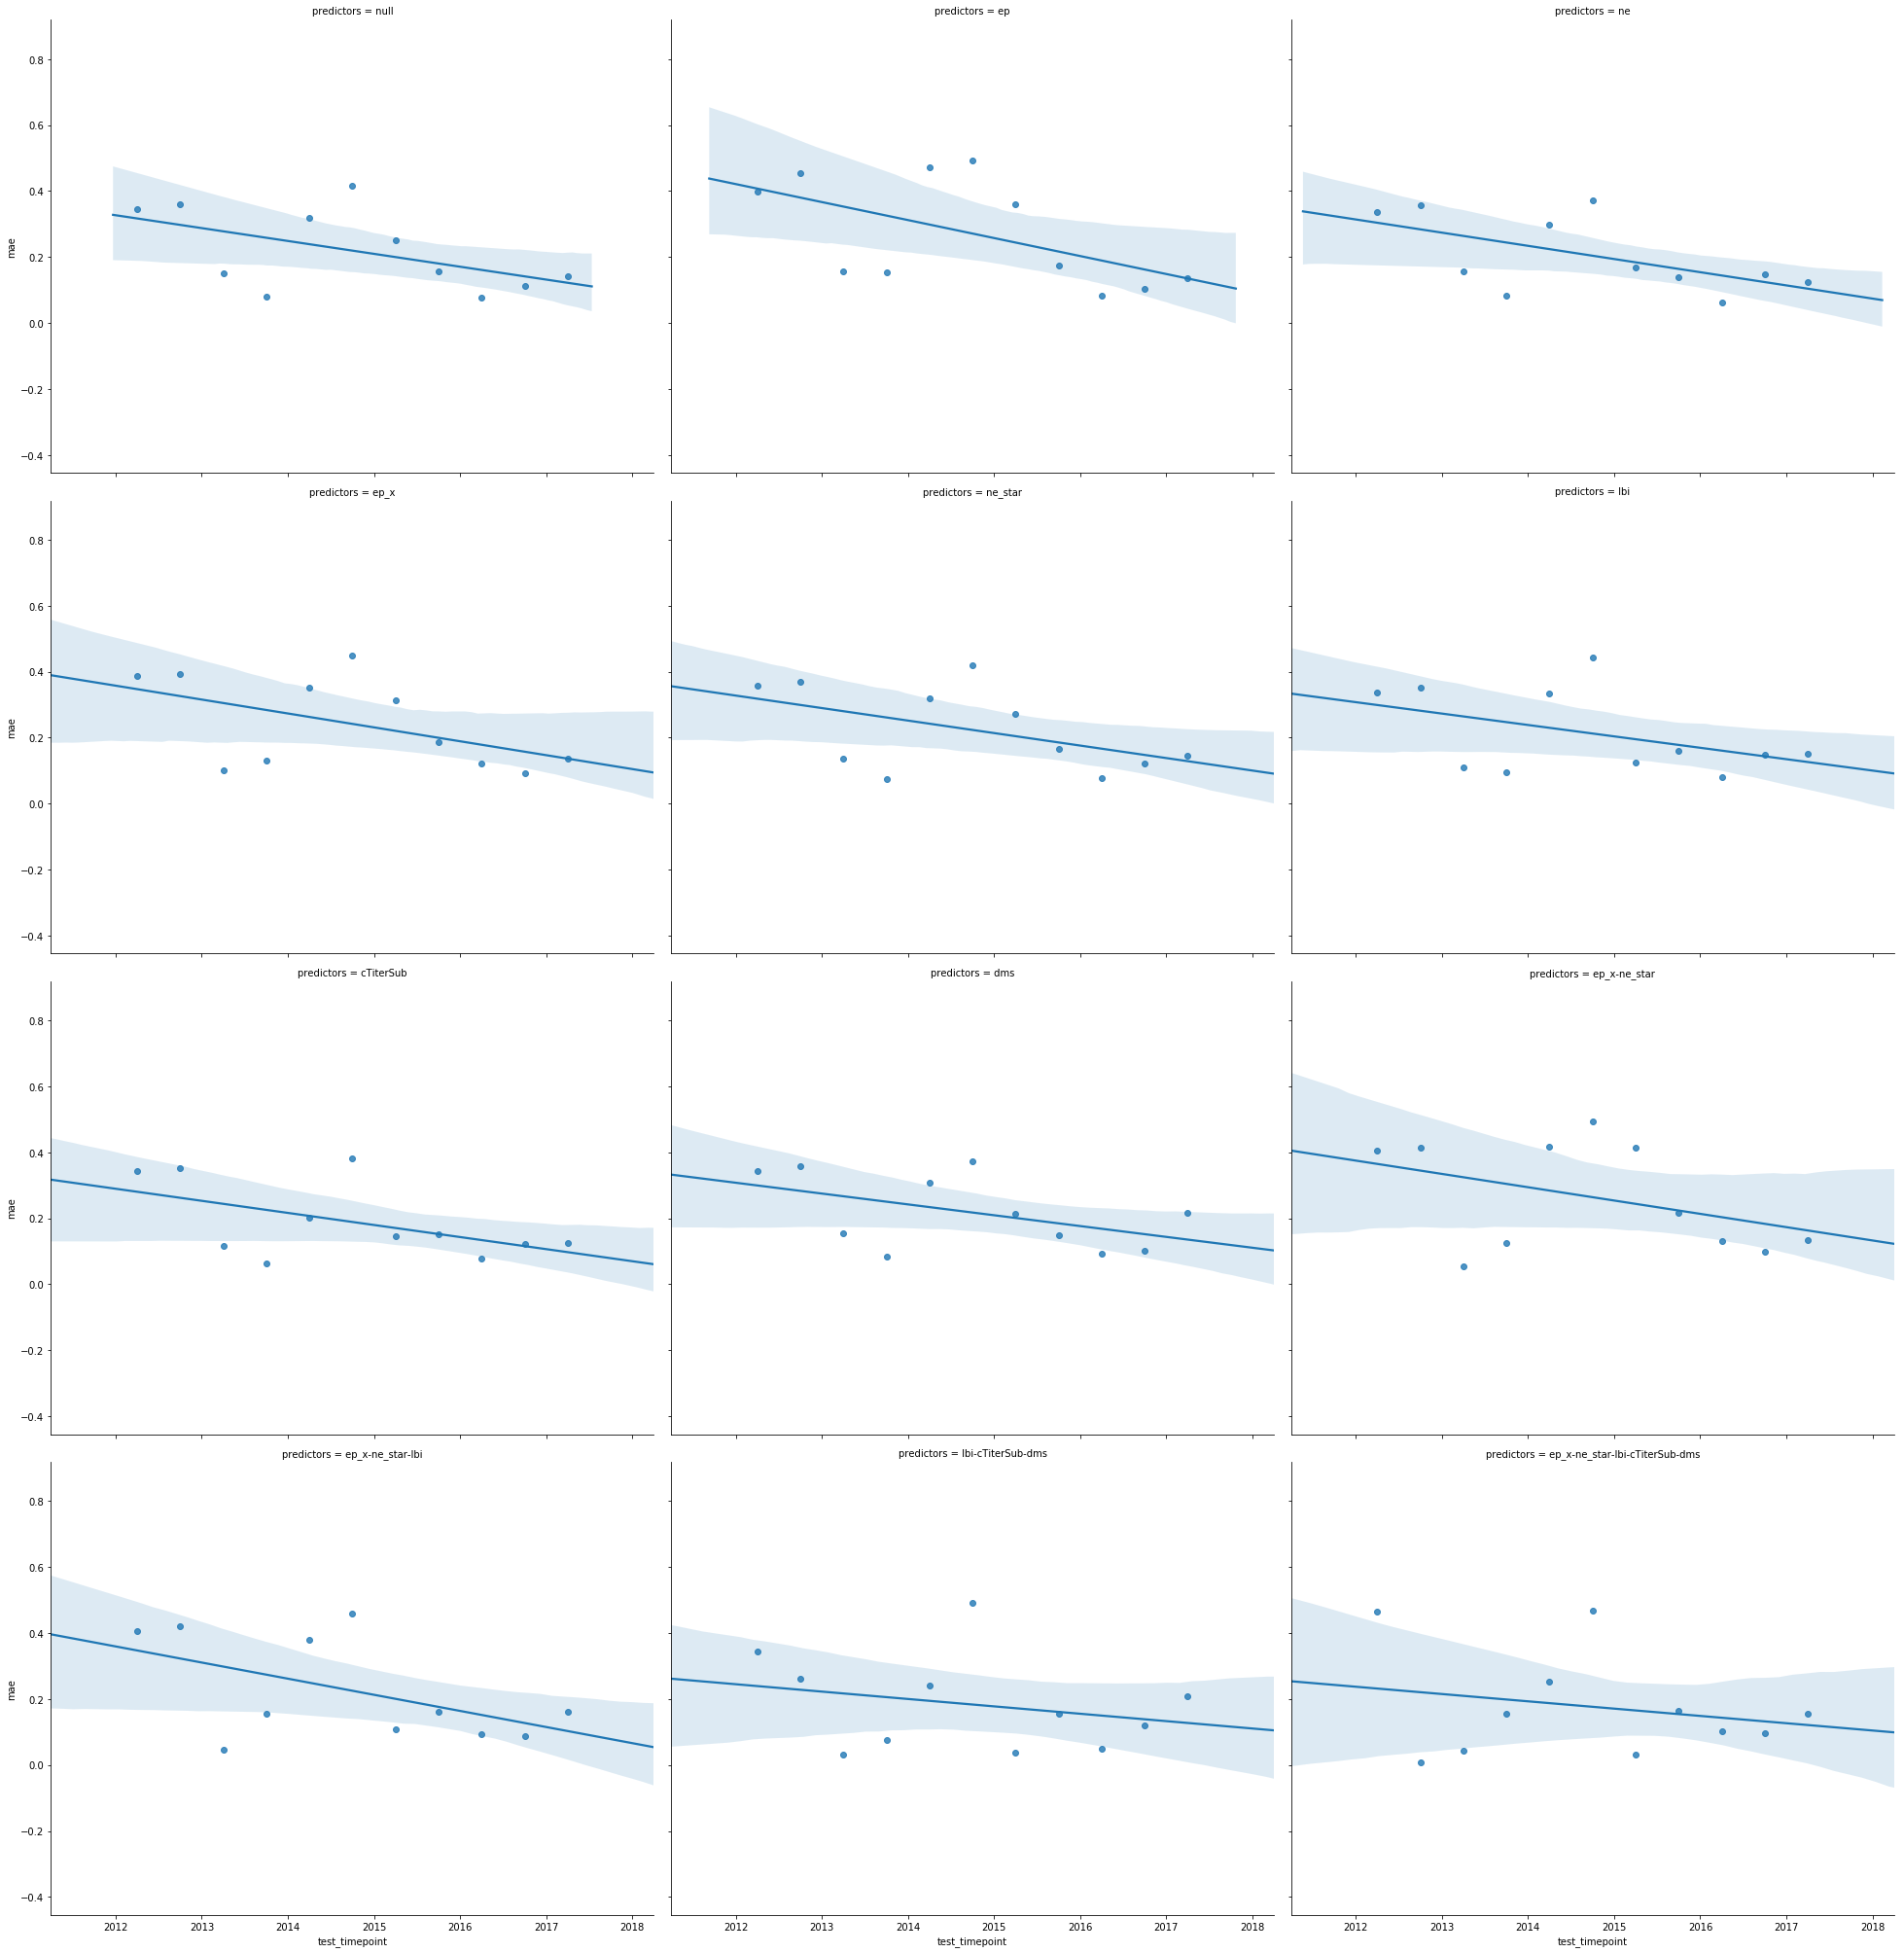

In [10]:
g = sns.lmplot(
    "test_timepoint",
    "mae",
    col="predictors",
    data=df,
    col_wrap=3,
    height=7,
    aspect=1.3
)
for ax in g.axes.flatten():
    ax.set_xlim(df["test_timepoint"].min() - 1, df["test_timepoint"].max() + 1)

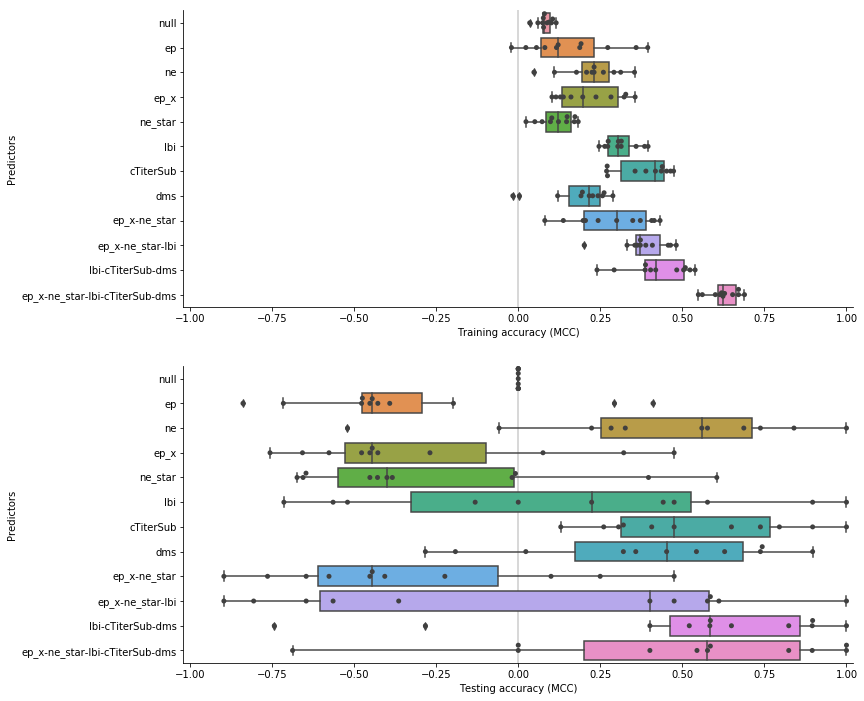

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot training accuracy on the top panel.
sns.boxplot(
    y="predictors",
    x="training_accuracy",
    data=df,
    ax=axes[0]
)
sns.swarmplot(
    y="predictors",
    x="training_accuracy",
    data=df,
    ax=axes[0],
    color="0.25"
)

axes[0].set_xlabel("Training accuracy (MCC)")
axes[0].set_ylabel("Predictors")
axes[0].axvline(0, color="#999999", alpha=0.5, zorder=-10)
axes[0].set_xlim(-1.02, 1.02)

# Plot testing accuracy on the bottom panel.
sns.boxplot(
    y="predictors",
    x="testing_accuracy",
    data=df,
    ax=axes[1]
)
sns.swarmplot(
    y="predictors",
    x="testing_accuracy",
    data=df,
    ax=axes[1],
    color="0.25"
)

axes[1].set_xlabel("Testing accuracy (MCC)")
axes[1].set_ylabel("Predictors")
axes[1].axvline(0, color="#999999", alpha=0.5, zorder=-10)
axes[1].set_xlim(-1.02, 1.02)

sns.despine()

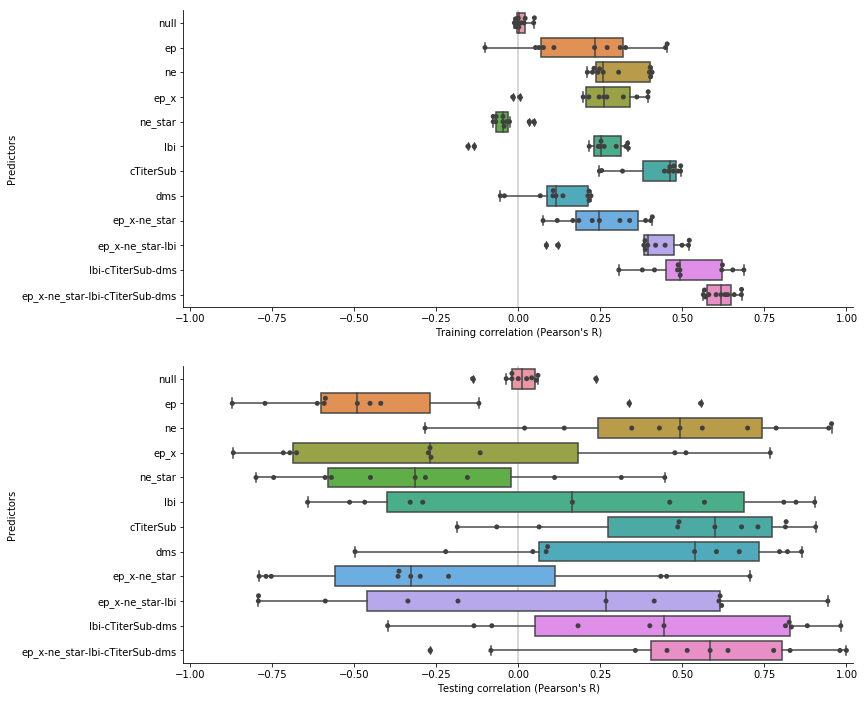

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot training correlation on the top panel.
sns.boxplot(
    y="predictors",
    x="training_correlation",
    data=df,
    ax=axes[0]
)
sns.swarmplot(
    y="predictors",
    x="training_correlation",
    data=df,
    ax=axes[0],
    color="0.25"
)

axes[0].set_xlabel("Training correlation (Pearson's R)")
axes[0].set_ylabel("Predictors")
axes[0].axvline(0, color="#999999", alpha=0.5, zorder=-10)
axes[0].set_xlim(-1.02, 1.02)

# Plot testing correlation on the bottom panel.
sns.boxplot(
    y="predictors",
    x="testing_correlation",
    data=df,
    ax=axes[1]
)
sns.swarmplot(
    y="predictors",
    x="testing_correlation",
    data=df,
    ax=axes[1],
    color="0.25"
)

axes[1].set_xlabel("Testing correlation (Pearson's R)")
axes[1].set_ylabel("Predictors")
axes[1].axvline(0, color="#999999", alpha=0.5, zorder=-10)
axes[1].set_xlim(-1.02, 1.02)

sns.despine()

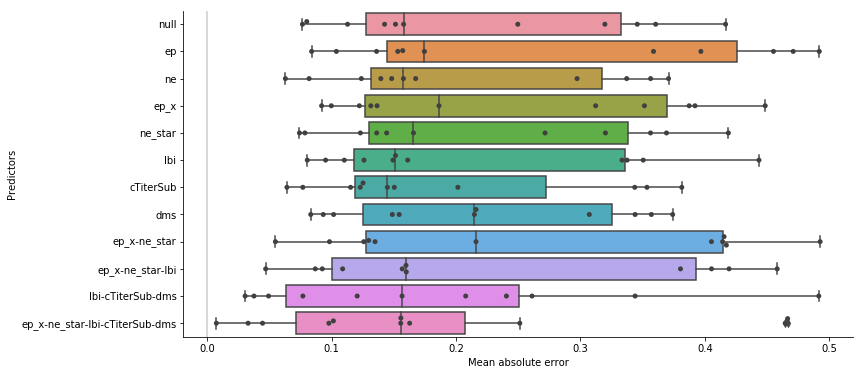

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Plot training accuracy on the top panel.
sns.boxplot(
    y="predictors",
    x="mae",
    data=df,
    ax=ax
)
sns.swarmplot(
    y="predictors",
    x="mae",
    data=df,
    ax=ax,
    color="0.25"
)

ax.set_xlabel("Mean absolute error")
ax.set_ylabel("Predictors")
ax.axvline(0, color="#999999", alpha=0.5, zorder=-10)

sns.despine()

In [15]:
df["predictors"].unique()

array(['null', 'ep', 'ne', 'ep_x', 'ne_star', 'lbi', 'cTiterSub', 'dms',
       'ep_x-ne_star', 'ep_x-ne_star-lbi', 'lbi-cTiterSub-dms',
       'ep_x-ne_star-lbi-cTiterSub-dms'], dtype=object)

In [16]:
parameter_columns = [column for column in df.columns if column.startswith("parameter-")]
df.loc[:, ["predictors"] + parameter_columns].groupby("predictors").aggregate(["mean", "std"])

parameter-cTiterSub           parameter-dms  \
                                              mean       std          mean   
predictors                                                                   
cTiterSub                                 0.601653  0.330151           NaN   
dms                                            NaN       NaN      0.338608   
ep                                             NaN       NaN           NaN   
ep_x                                           NaN       NaN           NaN   
ep_x-ne_star                                   NaN       NaN           NaN   
ep_x-ne_star-lbi                               NaN       NaN           NaN   
ep_x-ne_star-lbi-cTiterSub-dms            0.893464  0.301250     -0.121965   
lbi                                            NaN       NaN           NaN   
lbi-cTiterSub-dms                         1.121200  0.480251      0.083144   
ne                                             NaN       NaN           NaN   
ne_star                                        NaN       NaN           NaN   
null                                           NaN       NaN           NaN   

                                         parameter-ep          parameter-ep_x  \
                                     std         mean      std           mean   
predictors                                                                      
cTiterSub                            NaN          NaN      NaN            NaN   
dms                             0.191209          NaN      NaN            NaN   
ep                                   NaN     0.536018  0.88683            NaN   
ep_x                                 NaN          NaN      NaN       1.079074   
ep_x-ne_star                         NaN          NaN      NaN       1.547070   
ep_x-ne_star-lbi                     NaN          NaN      NaN       0.752800   
ep_x-ne_star-lbi-cTiterSub-dms  0.129987          NaN      NaN       1.330530   
lbi                                  NaN          NaN      NaN            NaN   
lbi-cTiterSub-dms               0.644160          NaN      NaN            NaN   
ne                                   NaN          NaN      NaN            NaN   
ne_star                              NaN          NaN      NaN            NaN   
null                                 NaN          NaN      NaN            NaN   

                                         parameter-lbi           parameter-ne  \
                                     std          mean       std         mean   
predictors                                                                      
cTiterSub                            NaN           NaN       NaN          NaN   
dms                                  NaN           NaN       NaN          NaN   
ep                                   NaN           NaN       NaN          NaN   
ep_x                            0.798680           NaN       NaN          NaN   
ep_x-ne_star                    1.230939           NaN       NaN          NaN   
ep_x-ne_star-lbi                0.654068      0.572428  0.289810          NaN   
ep_x-ne_star-lbi-cTiterSub-dms  0.641572      0.950676  0.214208          NaN   
lbi                                  NaN      0.411288  0.193582          NaN   
lbi-cTiterSub-dms                    NaN      0.565121  0.183453          NaN   
ne                                   NaN           NaN       NaN     0.482038   
ne_star                              NaN           NaN       NaN          NaN   
null                                 NaN           NaN       NaN          NaN   

                                         parameter-ne_star            \
                                     std              mean       std   
predictors                                                             
cTiterSub                            NaN               NaN       NaN   
dms                                  NaN               NaN       NaN   
ep                                   NaN               NaN       NaN

In [17]:
parameters_df = df.loc[:, ["predictors"] + parameter_columns].melt(
    "predictors",
    parameter_columns,
    var_name="predictor",
    value_name="parameter"
).dropna().copy()

In [18]:
parameters_df["predictor"] = parameters_df["predictor"].str.replace("parameter-", "")

In [19]:
parameters_df.head()

,predictors,predictor,parameter
66,cTiterSub,cTiterSub,0.022398
67,cTiterSub,cTiterSub,0.034677
68,cTiterSub,cTiterSub,0.249613
69,cTiterSub,cTiterSub,0.689379
70,cTiterSub,cTiterSub,0.731610


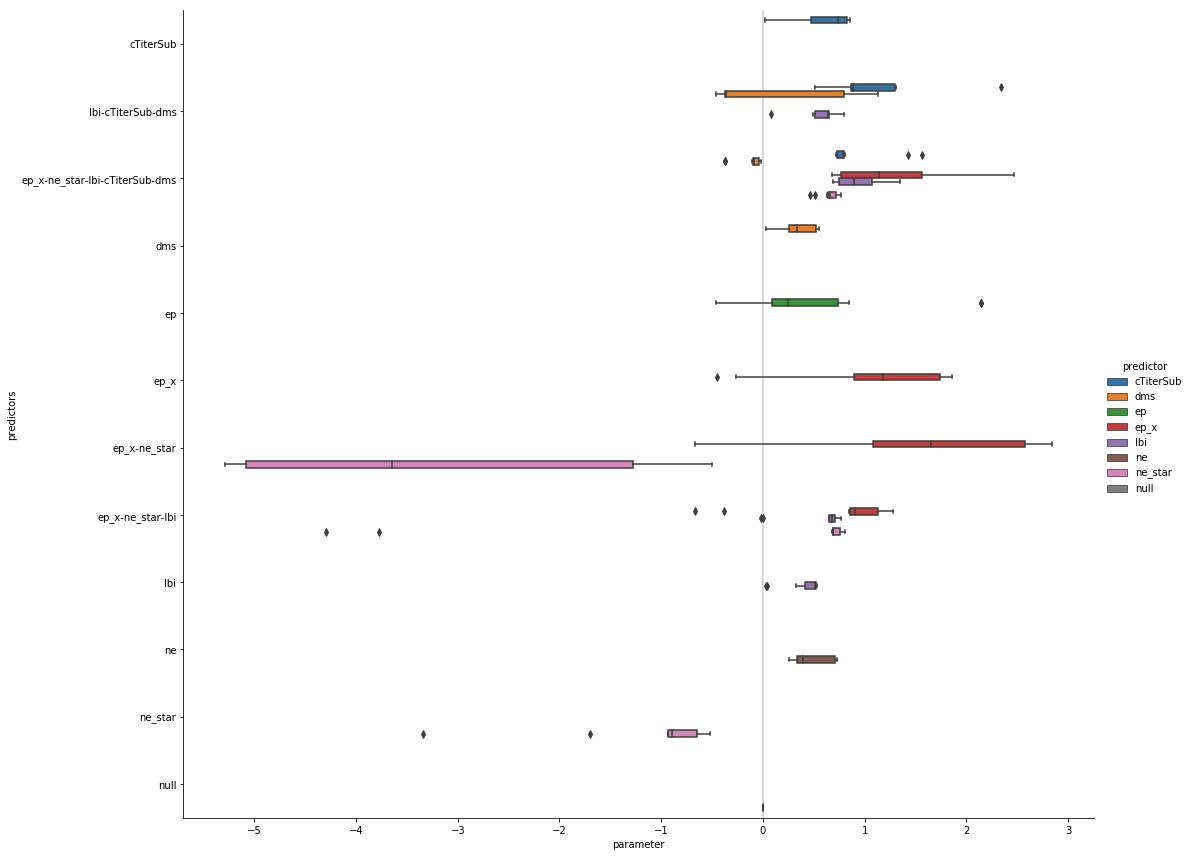

In [30]:
g = sns.catplot(
    y="predictors",
    x="parameter",
    data=parameters_df,
    hue="predictor",
    kind="box",
    height=12,
    aspect=1.3,
    dodge=1
)
g.ax.axvline(0, color="#999999", alpha=0.5, zorder=-10)

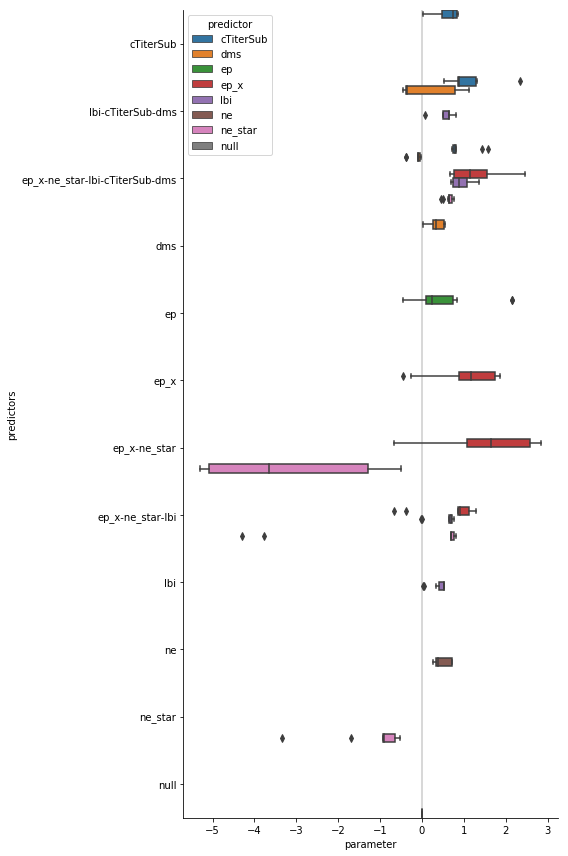

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8, 12))
sns.boxplot(
    y="predictors",
    x="parameter",
    data=parameters_df,
    hue="predictor",
    ax=ax,
    width=1.0,
    dodge=1.0
)
ax.axvline(0, color="#999999", alpha=0.5, zorder=-10)
sns.despine()
plt.tight_layout()

In [24]:
df[df["predictors"] == "cTiterSub"].loc[:, ["fn", "fp", "tn", "tp"]].sum()

fn     63
fp    108
tn    200
tp    272
dtype: int64

In [25]:
df[df["predictors"] == "cTiterSub"].loc[:, ["fn", "fp", "tn", "tp"]].sum().sum()

643

In [28]:
df[df["predictors"] == "cTiterSub"]["testing_accuracy"].mean()

0.54336873256471807

In [29]:
df[df["predictors"] == "cTiterSub"]["testing_accuracy"].median()

0.47492269448299651